<a href="https://colab.research.google.com/github/Susdhor/Data-Visualisation-with-python/blob/main/Yellow_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Import yellow texi data from net
Yellow_2018 = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2018-07.parquet", engine="pyarrow" )
Yellow_2018.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-07-01 00:28:09,2018-07-01 00:28:51,1.0,5.3,1.0,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,None,None
1,1,2018-07-01 00:29:27,2018-07-01 00:30:17,1.0,5.3,1.0,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,None,None
2,1,2018-07-01 00:04:19,2018-07-01 00:08:29,2.0,0.7,1.0,N,211,144,1,5.0,0.5,0.5,1.25,0.0,0.3,7.55,None,None
3,1,2018-07-01 00:14:26,2018-07-01 00:36:35,1.0,4.8,1.0,N,144,142,1,18.0,0.5,0.5,1.00,0.0,0.3,20.30,None,None
4,1,2018-07-01 00:41:56,2018-07-01 00:50:54,1.0,1.8,1.0,N,142,141,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80,None,None


## Filter data from 2018-07-02 to 2018-07-08 

In [4]:
yellow = Yellow_2018.loc[(Yellow_2018["tpep_pickup_datetime"] >= "2018-07-02 00:00:00") & (Yellow_2018["tpep_pickup_datetime"] <= "2018-07-08 23:59:59")] 
yellow.head() 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
44515,2,2018-07-02 06:05:12,2018-07-02 06:06:56,1.0,0.34,1.0,N,186,100,2,3.5,0.0,0.5,0.00,0.0,0.3,4.30,None,None
44516,2,2018-07-02 06:08:29,2018-07-02 06:12:22,1.0,0.78,1.0,N,100,246,1,5.0,0.0,0.5,1.16,0.0,0.3,6.96,None,None
44517,2,2018-07-02 06:23:00,2018-07-02 06:34:22,1.0,2.15,1.0,N,186,162,1,10.0,0.0,0.5,2.16,0.0,0.3,12.96,None,None
44518,2,2018-07-02 06:40:53,2018-07-02 06:51:00,1.0,0.95,1.0,N,162,48,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30,None,None
48233,2,2018-07-02 06:54:17,2018-07-02 06:56:54,1.0,0.39,1.0,N,48,68,2,4.0,0.0,0.5,0.00,0.0,0.3,4.80,None,None


## Check the  shape of data frame and description Statistics

In [5]:
yellow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508437 entries, 44515 to 7850637
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1508437 non-null  int64         
 1   tpep_pickup_datetime   1508437 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1508437 non-null  datetime64[ns]
 3   passenger_count        1508406 non-null  float64       
 4   trip_distance          1508437 non-null  float64       
 5   RatecodeID             1508406 non-null  float64       
 6   store_and_fwd_flag     1508406 non-null  object        
 7   PULocationID           1508437 non-null  int64         
 8   DOLocationID           1508437 non-null  int64         
 9   payment_type           1508437 non-null  int64         
 10  fare_amount            1508437 non-null  float64       
 11  extra                  1508437 non-null  float64       
 12  mta_tax                1

In [6]:
yellow.shape

(1508437, 19)

In [7]:
# Statical view of yellow Taxi Data
yellow.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.508437e+06,1.508406e+06,1.508437e+06,1.508406e+06,1.508437e+06,1.508437e+06,1.508437e+06,1.508437e+06,1.508437e+06,1.508437e+06,1.508437e+06,1.508437e+06,1.508437e+06,1.508437e+06
mean,1.599216e+00,1.635147e+00,2.981650e+00,1.047554e+00,1.604827e+02,1.581782e+02,1.370056e+00,1.253634e+01,3.093075e-01,4.970262e-01,1.622357e+00,3.232844e-01,2.994595e-01,1.559118e+01
std,4.908362e-01,1.262741e+00,3.884303e+00,5.090396e-01,6.685692e+01,7.095912e+01,5.042457e-01,1.162669e+01,4.454503e-01,4.473828e-02,2.426132e+00,1.665127e+00,1.727295e-02,1.408911e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.980000e+02,-1.516000e+01,-5.000000e-01,-2.520000e+00,-5.760000e+00,-3.000000e-01,-4.988000e+02
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,1.130000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,1.000000e+00,1.630000e+00,1.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.150000e+00,0.000000e+00,3.000000e-01,1.116000e+01
75%,2.000000e+00,2.000000e+00,3.080000e+00,1.000000e+00,2.310000e+02,2.310000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.664000e+01
max,4.000000e+00,9.000000e+00,1.826600e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,7.000000e+02,4.500000e+00,1.549000e+01,2.200000e+02,8.003200e+02,1.000000e+00,8.531200e+02


In [8]:
# To See all Columns names
yellow.keys()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [9]:
# How Many unique values in each column
yellow.nunique()

VendorID                      3
tpep_pickup_datetime     503404
tpep_dropoff_datetime    505070
passenger_count              10
trip_distance              3394
RatecodeID                    7
store_and_fwd_flag            2
PULocationID                252
DOLocationID                260
payment_type                  5
fare_amount                 823
extra                        16
mta_tax                       5
tip_amount                 2184
tolls_amount                423
improvement_surcharge         4
total_amount               6788
congestion_surcharge          0
airport_fee                   0
dtype: int64

## Ganing information of checking all column by groupby here is some example

In [10]:
yellow.groupby('trip_distance')['trip_distance'].agg('count')

trip_distance
0.00      11073
0.01        572
0.02        397
0.03        347
0.04        271
          ...  
104.15        1
142.20        4
142.50        1
149.32        1
182.66        1
Name: trip_distance, Length: 3394, dtype: int64

In [11]:
yellow.groupby('payment_type')['payment_type'].agg('count')

payment_type
0        31
1    963582
2    533918
3      8399
4      2507
Name: payment_type, dtype: int64

Scatterplot for finding relationship with **fare_amount** variable some important plots

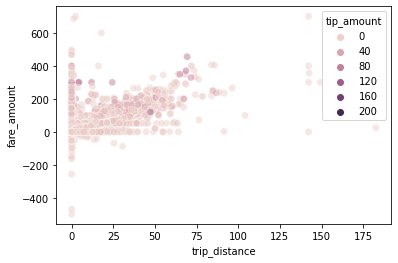

In [12]:
sns.scatterplot(x="trip_distance", y="fare_amount", hue='tip_amount', data=yellow, s= 50, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


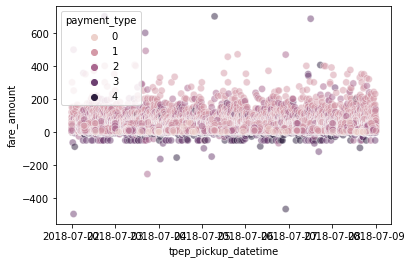

In [13]:
sns.scatterplot(x="tpep_pickup_datetime", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

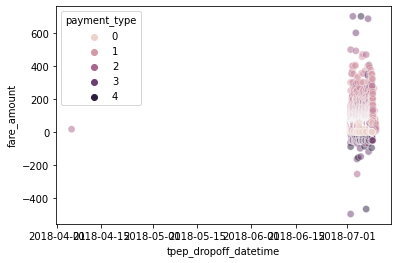

In [14]:
sns.scatterplot(x="tpep_dropoff_datetime", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

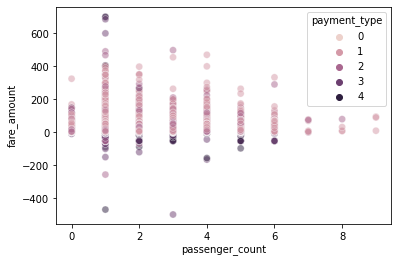

In [15]:
sns.scatterplot(x="passenger_count", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

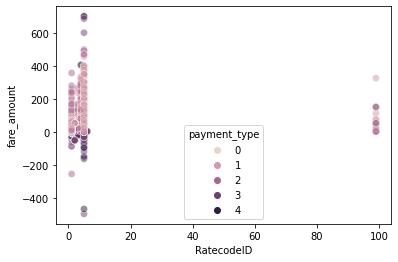

In [16]:
sns.scatterplot(x="RatecodeID", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

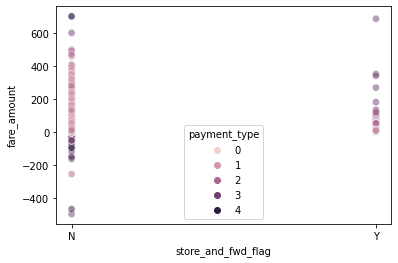

In [17]:
sns.scatterplot(x="store_and_fwd_flag", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


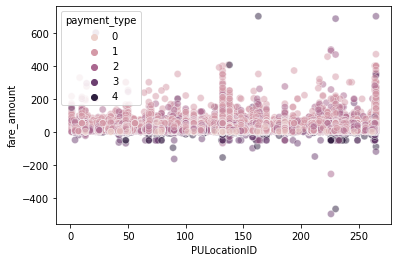

In [18]:
sns.scatterplot(x="PULocationID", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


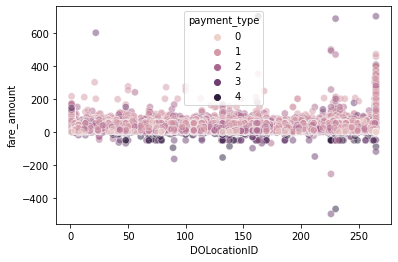

In [19]:
sns.scatterplot(x="DOLocationID", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

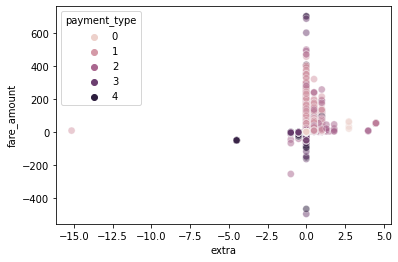

In [20]:
sns.scatterplot(x="extra", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

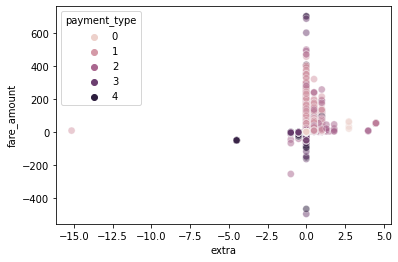

In [21]:
sns.scatterplot(x="extra", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

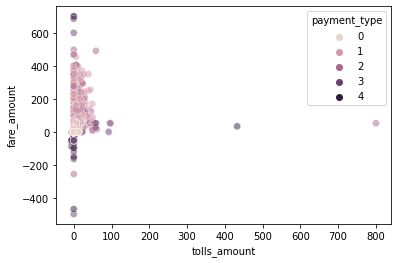

In [22]:
sns.scatterplot(x="tolls_amount", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

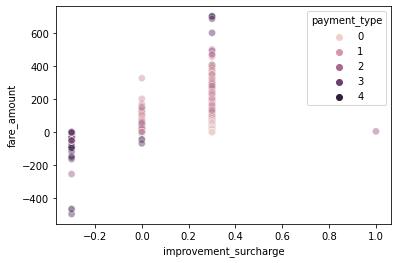

In [23]:
sns.scatterplot(x="improvement_surcharge", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

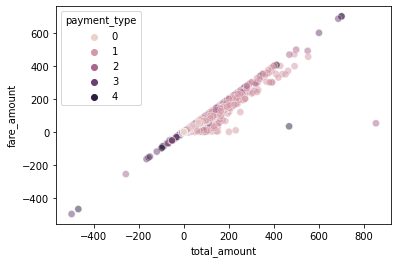

In [24]:
sns.scatterplot(x="total_amount", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

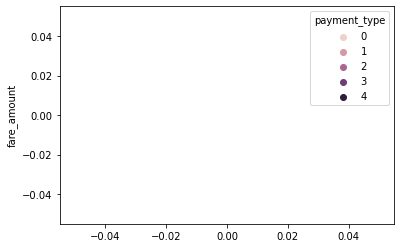

In [25]:
sns.scatterplot(x="congestion_surcharge", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

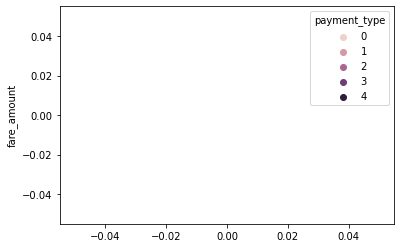

In [26]:
sns.scatterplot(x="airport_fee", y="fare_amount", hue='payment_type', data=yellow, s= 50, alpha=0.5)

After checking the scatter plot find some important co-related feature it shows in pairplot

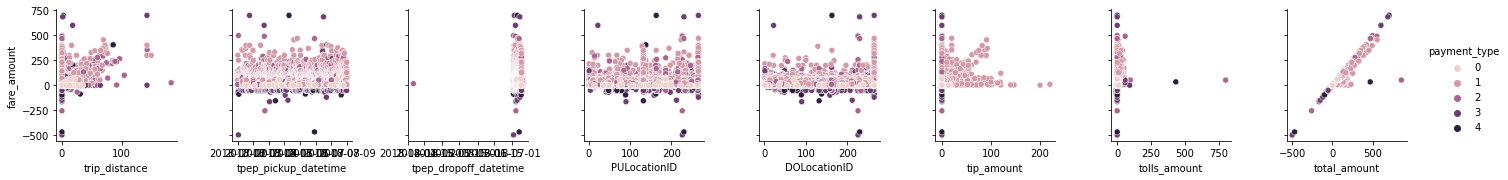

In [27]:
sns.pairplot(yellow,
             hue='payment_type', 
             y_vars=['fare_amount'],
            x_vars=['trip_distance','tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID','DOLocationID','tip_amount', 'tolls_amount', 'total_amount'])

## Nan Value Check and Fixing

In [29]:
missing = yellow.isnull().sum()
print(missing)

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count               31
trip_distance                  0
RatecodeID                    31
store_and_fwd_flag            31
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1508437
airport_fee              1508437
dtype: int64


In [31]:
# Showing all variables with Nan values
missing_data = missing[missing > 31]
missing_data

congestion_surcharge    1508437
airport_fee             1508437
dtype: int64

In [33]:
# Delating Columns with Majority of Missing Value
remove_column = missing_data.index
yellow.drop(remove_column,axis=1,inplace=True)
yellow.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508437 entries, 44515 to 7850637
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1508437 non-null  int64         
 1   tpep_pickup_datetime   1508437 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1508437 non-null  datetime64[ns]
 3   passenger_count        1508406 non-null  float64       
 4   trip_distance          1508437 non-null  float64       
 5   RatecodeID             1508406 non-null  float64       
 6   store_and_fwd_flag     1508406 non-null  object        
 7   PULocationID           1508437 non-null  int64         
 8   DOLocationID           1508437 non-null  int64         
 9   payment_type           1508437 non-null  int64         
 10  fare_amount            1508437 non-null  float64       
 11  extra                  1508437 non-null  float64       
 12  mta_tax                1

In [34]:
# Handle Missing value
data = yellow.dropna()
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [35]:
data.shape

(1508406, 17)

## Outliar remove by Checking Boxplot and using IQR

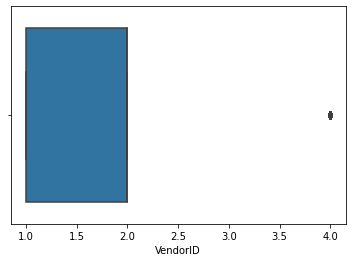

In [36]:
sns.boxplot(x=data['VendorID'])

In [37]:
first_quartile = data['VendorID'].quantile(.25)
third_quartile = data['VendorID'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['VendorID']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


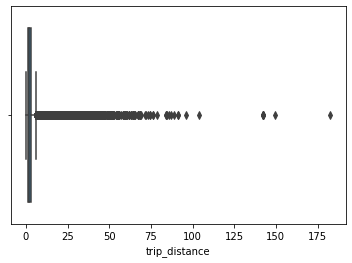

In [42]:
sns.boxplot(x=data['trip_distance'])

In [43]:
first_quartile = data['trip_distance'].quantile(.25)
third_quartile = data['trip_distance'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['trip_distance']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


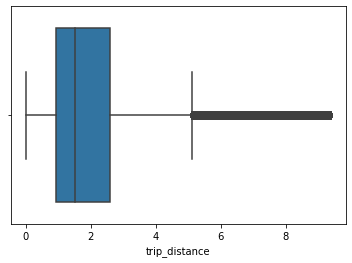

In [44]:
sns.boxplot(x=data['trip_distance'])

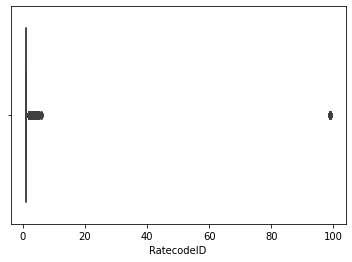

In [46]:
sns.boxplot(x=data['RatecodeID'])

In [48]:
first_quartile = data['RatecodeID'].quantile(.25)
third_quartile = data['RatecodeID'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['RatecodeID']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


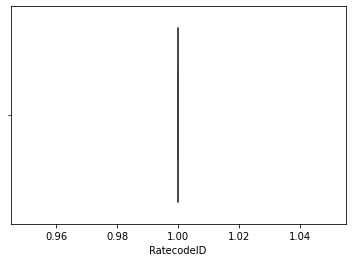

In [49]:
sns.boxplot(x=data['RatecodeID'])

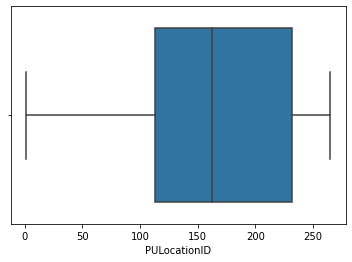

In [51]:
sns.boxplot(x=data['PULocationID'])

In [52]:
first_quartile = data['PULocationID'].quantile(.25)
third_quartile = data['PULocationID'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['PULocationID']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


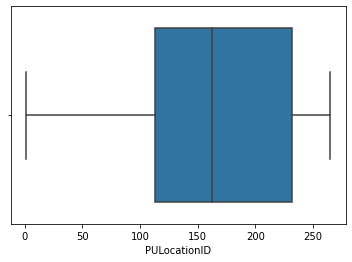

In [53]:
sns.boxplot(x=data['PULocationID'])

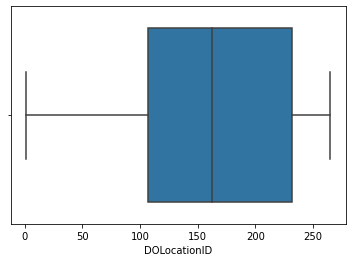

In [54]:
sns.boxplot(x=data['DOLocationID'])

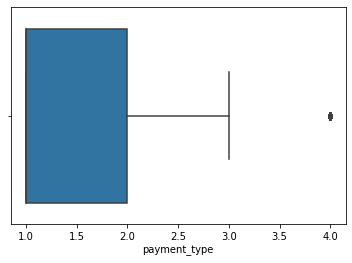

In [55]:
sns.boxplot(x=data['payment_type'])

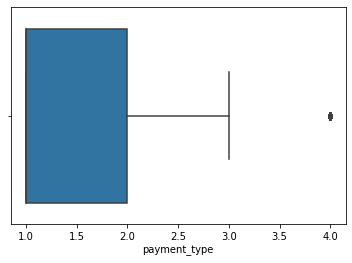

In [56]:
sns.boxplot(x=data['payment_type'])

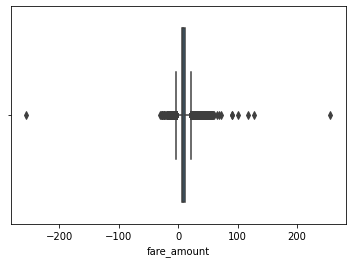

In [57]:
sns.boxplot(x=data['fare_amount'])

In [58]:
first_quartile = data['fare_amount'].quantile(.25)
third_quartile = data['fare_amount'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['fare_amount']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


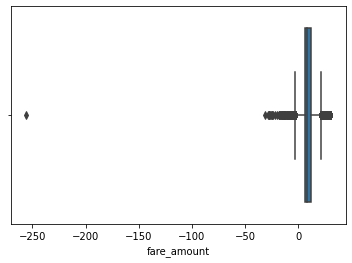

In [59]:
sns.boxplot(x=data['fare_amount'])

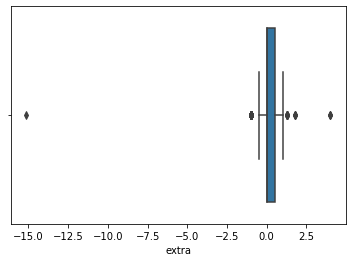

In [60]:
sns.boxplot(x=data['extra'])

In [61]:
first_quartile = data['extra'].quantile(.25)
third_quartile = data['extra'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['extra']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


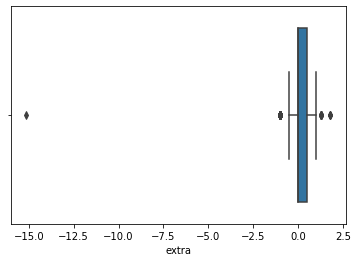

In [62]:
sns.boxplot(x=data['extra'])

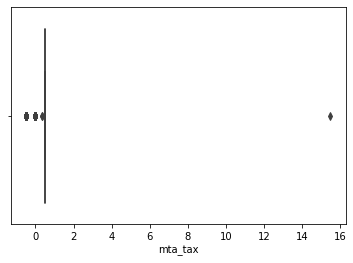

In [63]:
sns.boxplot(x=data['mta_tax'])


In [65]:
first_quartile = data['mta_tax'].quantile(.25)
third_quartile = data['mta_tax'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['mta_tax']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


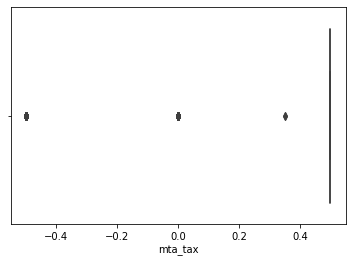

In [66]:
sns.boxplot(x=data['mta_tax'])

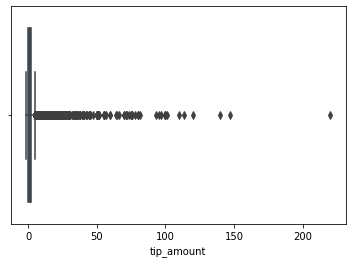

In [68]:
sns.boxplot(x=data['tip_amount'])

In [69]:
first_quartile = data['tip_amount'].quantile(.25)
third_quartile = data['tip_amount'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['tip_amount']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


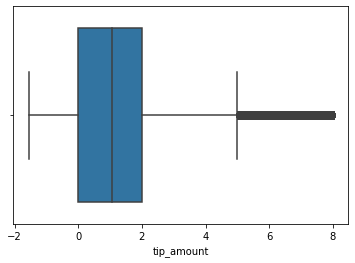

In [70]:
sns.boxplot(x=data['tip_amount'])

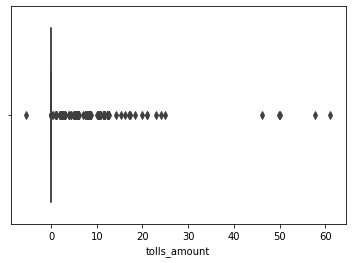

In [71]:
sns.boxplot(x=data['tolls_amount'])

In [72]:
first_quartile = data['tolls_amount'].quantile(.25)
third_quartile = data['tolls_amount'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['tolls_amount']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


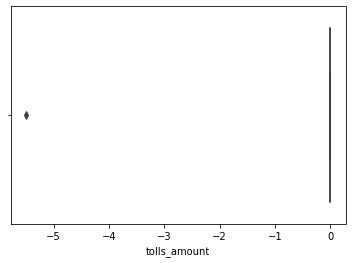

In [73]:
sns.boxplot(x=data['tolls_amount'])

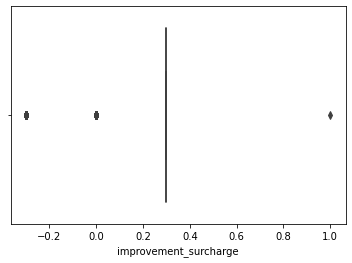

In [74]:
sns.boxplot(x=data['improvement_surcharge'])

In [75]:
first_quartile = data['improvement_surcharge'].quantile(.25)
third_quartile = data['improvement_surcharge'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['improvement_surcharge']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


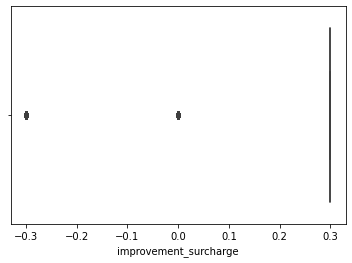

In [76]:
sns.boxplot(x=data['improvement_surcharge'])

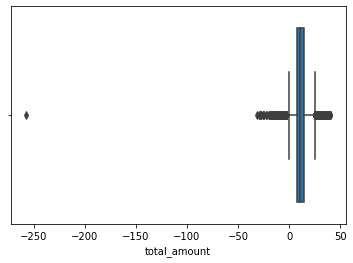

In [77]:
sns.boxplot(x=data['total_amount'])

In [78]:
first_quartile = data['total_amount'].quantile(.25)
third_quartile = data['total_amount'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 3 *IQR
data.drop(data[data['total_amount']>new_boundary].index,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


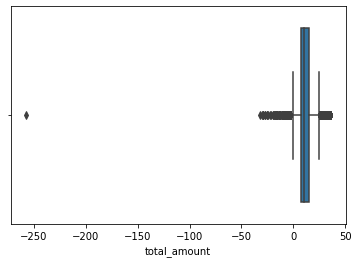

In [79]:
sns.boxplot(x=data['total_amount'])

In [80]:
data.shape

(1372592, 17)

Removing Low Varience feature

In [85]:
from sklearn.feature_selection import VarianceThreshold


In [86]:
low_varience = VarianceThreshold(threshold = 0.0)
low_varience.fit(data)

TypeError: ignored